In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
def generate_synthetic_samples(xDim, xCoeff_lst, b, N, Seed = 42):
    """
    Generates a synthetic dataset using a linear equation.
    
    Params:
    ---------
    
    xDim        dimension of the input features
    xCoeff_lst  list of coefficients
    b           value of the bias
    N           number of samples to generate
    Seed        value for the random seed
    """
    # set the random seed, to fix the random generator
    np.random.seed(Seed)
    
    # generates a random ndarray with dimensions N rows & xDim columns 
    x = np.random.rand(N,xDim) 
    
    # convert the coefficient list into numpy ndarray
    xCoeff = np.asarray(xCoeff_lst)
    
    # calculate the linear combination using numpy vectorization
    y = np.dot(x, xCoeff) + b
    
    # reshape y to be in the same dimensions as x (N, xDim) as (N,1)
    y = y.reshape(N, 1)
    
    # return a tuple that contains x, and y 
    return (x, y)

In [3]:
def MSE_loss(y, y_hat):
    """
    Implements the Mean Square Error loss function for regression
    
    Params:
    ---------
    
    y     - vector of the true target variable values 
    y_hat - vector of the predicted target variable value
    """
    return np.square(np.subtract(y, y_hat)).mean()

In [4]:
def perform_gradient_training(X, y, lr=0.05, epoch=20, Seed=42):
    """
    Trains a multivariate linear regression model using gradient decent
    """
    
    # set the random seed, to fix the random generator
    np.random.seed(Seed)
        
    # initialize randomly the weight and bias parameters of the linear model
    xDim = X.shape[1]
    w, b = np.random.randn(xDim).reshape(xDim,1), np.random.randn(1)[0]
    
    # lists to store learning process
    param_log, lossVals = [], [] 
    
    # number of samples
    N = len(X) 
    
    # Training loops for the specified number of epochs ...
    for i in range(epoch):
        
        y_hat = (np.dot(X, w) + b).reshape(y.shape[0],1)
        
        loss_term = y -  y_hat # y^i - (w.x^i + b)
            
        # Updating w and b using partial derivatives of the gradient ...
        # dl/dw = {Sum[i=1 to N](-2 * x^i * (y^i - (w.x^i + b)))}/N
        # dl/db = {Sum[i=1 to N](-2 * (y^i - (w.x^i + b)))}/N
        
        # X.transpose() (xDim x N) dot loss_term (N x 1) gives (xDim x 1)
        w -= lr * (-2 * X.transpose().dot(loss_term).sum() / N)
        b -= lr * (-2 * loss_term.sum() / N)
        
        param_log.append((w, b))
        loss_val = MSE_loss(y,  y_hat)
        lossVals.append(loss_val) 
        
        print("Finished epoch {}, loss value is {}".format(i+1,loss_val))
    
    return w, b, param_log, lossVals

In [5]:
# generate the synthetic dataset ...
X_synth, y_synth = generate_synthetic_samples(3, [5, 3, 1.5], 6, 1000)

In [6]:
# split the generated dataset into train and test splits using builtin Sklearn function
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.3, random_state=42)

In [7]:
w, b, params_log, losses = perform_gradient_training(X_train, y_train)

Finished epoch 1, loss value is 80.68803498777675
Finished epoch 2, loss value is 34.8084858617355
Finished epoch 3, loss value is 15.335771541183963
Finished epoch 4, loss value is 7.06897043906531
Finished epoch 5, loss value is 3.5575010470761
Finished epoch 6, loss value is 2.0640287850990617
Finished epoch 7, loss value is 1.426952436618958
Finished epoch 8, loss value is 1.1533404707884476
Finished epoch 9, loss value is 1.0340144132868287
Finished epoch 10, loss value is 0.9802077104376227
Finished epoch 11, loss value is 0.9542511694163588
Finished epoch 12, loss value is 0.9401590069665744
Finished epoch 13, loss value is 0.9311469042107787
Finished epoch 14, loss value is 0.9243352358527195
Finished epoch 15, loss value is 0.9185013610658527
Finished epoch 16, loss value is 0.9131257976849643
Finished epoch 17, loss value is 0.9079874617097461
Finished epoch 18, loss value is 0.9029919051920753
Finished epoch 19, loss value is 0.898098428057381
Finished epoch 20, loss value i

Text(0, 0.5, 'MSE loss value')

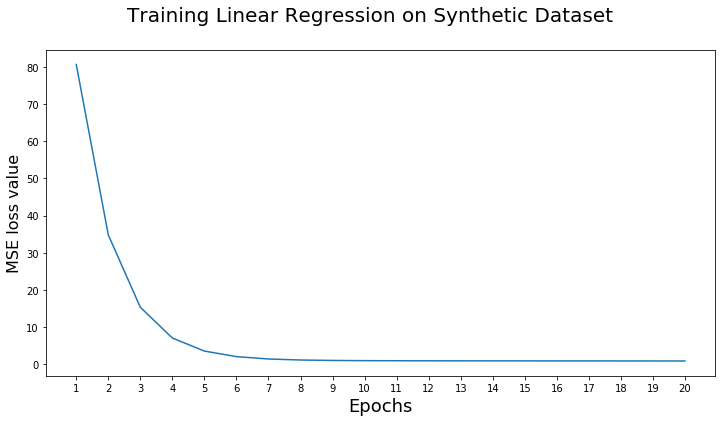

In [8]:
num_of_epochs = 20
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(1,num_of_epochs + 1), losses)
fig.suptitle('Training Linear Regression on Synthetic Dataset', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.xticks(np.arange(1,num_of_epochs + 1))
plt.ylabel('MSE loss value', fontsize=16)

In [9]:
final_loss_value = losses[-1]
print("The trained model can predict the true target variable in training data with error margin equals to {}".format(np.round(final_loss_value,2)))

The trained model can predict the true target variable in training data with error margin equals to 0.89


In [10]:
final_w = params_log[-1][0].flatten()
final_b = params_log[-1][1]
print("The final optimized parameters values for w = {}, and for b = {}".format(final_w, final_b))

The final optimized parameters values for w = [ 4.40476798  3.76978953  4.55574237], and for b = 4.296057258958749


In [11]:
# Testing the trained model on test dataset ...
y_hat_test = (np.dot(X_test, final_w) + final_b).reshape(y_test.shape[0],1)
test_loss = MSE_loss(y_test, y_hat_test)
print("The trained model can predict the true target variable in test data with error margin equals to {}".format(np.round(test_loss,2)))

The trained model can predict the true target variable in test data with error margin equals to 0.87
